In [1]:
import gym
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import skvideo.io

[2018-04-07 16:26:18,186] Making new env: Pong-v0


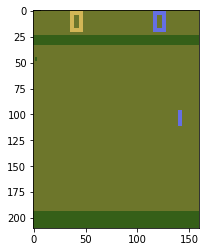

In [2]:
env = gym.make('Pong-v0')
env.reset()

fig = plt.figure()

arr = env.render(mode='rgb_array')

plt.imshow(arr);


In [3]:
arr.shape

(210, 160, 3)

In [4]:
def prepro(I):
    I = I[35:195] # crop
    I = I[::2,::2,0] # downsample by factor of 2
    I[I == 144] = 0 # erase background (background type 1)
    I[I == 109] = 0 # erase background (background type 2)
    I[I != 0] = 1 # everything else (paddles, ball) just set to 1
    return I

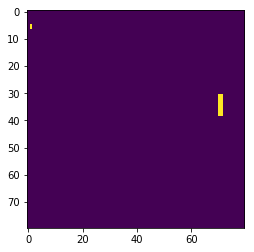

In [5]:
plt.imshow(prepro(arr));

In [6]:
image = []
env.reset()
for t in range(1000):
    obs, reward, done, info = env.step(0)
    if t >900:
        image.append(env.render(mode='rgb_array'))


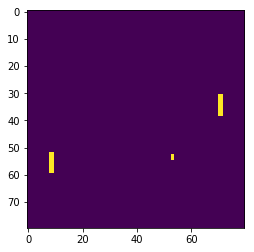

In [7]:
plt.imshow(prepro(image[6]));

In [11]:
env = gym.make('Pong-v0')
env.reset()

writer = skvideo.io.FFmpegWriter("./pong_random_actions.mp4")

while True:
    writer.writeFrame(env.render(mode='rgb_array'))
    obs, reward, done, info = env.step(env.action_space.sample())
    if done:
        break

writer.close()

[2018-04-07 16:27:56,379] Making new env: Pong-v0
